# Exploratory data analysis of Online Retail dataset

We have one single xls file in which we have the following columns: invoiceno, stockcode, description, quantity, invoicedate, unitprice, customerid and country. We analyse the data and answer few questions related to the company. The questions are as follows: 

1. Based on your understanding of the data, what kind of business is this company in?
2. Analyze the sales performance of this company, and provide your insights regarding the same
3. Based on your analysis of the data, what are potential areas of improvement for the business?
4. What are additional business problems that can be analyzed using this data. Support with explanation.

## 1. Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

%matplotlib inline

## Loading the Dataset

In [2]:
df = pd.read_csv("Online Retail.csv")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [3]:
df=df[['CustomerID','InvoiceNo','StockCode','Quantity','UnitPrice','Description','InvoiceDate','Country']]
df.head()

,CustomerID,InvoiceNo,StockCode,Quantity,UnitPrice,Description,InvoiceDate,Country
0,17850.0,536365,85123A,6,2.55,WHITE HANGING HEART T-LIGHT HOLDER,01-12-2010 08:26,United Kingdom
1,17850.0,536365,71053,6,3.39,WHITE METAL LANTERN,01-12-2010 08:26,United Kingdom
2,17850.0,536365,84406B,8,2.75,CREAM CUPID HEARTS COAT HANGER,01-12-2010 08:26,United Kingdom
3,17850.0,536365,84029G,6,3.39,KNITTED UNION FLAG HOT WATER BOTTLE,01-12-2010 08:26,United Kingdom
4,17850.0,536365,84029E,6,3.39,RED WOOLLY HOTTIE WHITE HEART.,01-12-2010 08:26,United Kingdom


## Data Preprocessing

In [4]:
df.isnull().sum()

CustomerID     135080
InvoiceNo           0
StockCode           0
Quantity            0
UnitPrice           0
Description      1454
InvoiceDate         0
Country             0
dtype: int64

In [5]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

## 1. Based on your understanding of the data, what kind of business is this company in?

Answer - As the name suggest this company is more into online retail across 38 countries like
'United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany', 'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal', 'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland', 'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria', 'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore', 'Lebanon', 'United Arab Emirates', 'Saudi Arabia', 'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA', 'European Community', 'Malta', 'RSA'

## 2. Analyze the sales performance of this company, and provide your insights regarding the same

In [6]:
TotalAmount = df['Quantity'] * df['UnitPrice']
df.insert(loc=5,column='TotalAmount',value=TotalAmount)

In [7]:
new_df = df[['CustomerID','InvoiceNo','StockCode','Quantity','TotalAmount','InvoiceDate','Country']]
new_df2 = df.copy()
new_df2.head()

,CustomerID,InvoiceNo,StockCode,Quantity,UnitPrice,TotalAmount,Description,InvoiceDate,Country
0,17850.0,536365,85123A,6,2.55,15.30,WHITE HANGING HEART T-LIGHT HOLDER,01-12-2010 08:26,United Kingdom
1,17850.0,536365,71053,6,3.39,20.34,WHITE METAL LANTERN,01-12-2010 08:26,United Kingdom
2,17850.0,536365,84406B,8,2.75,22.00,CREAM CUPID HEARTS COAT HANGER,01-12-2010 08:26,United Kingdom
3,17850.0,536365,84029G,6,3.39,20.34,KNITTED UNION FLAG HOT WATER BOTTLE,01-12-2010 08:26,United Kingdom
4,17850.0,536365,84029E,6,3.39,20.34,RED WOOLLY HOTTIE WHITE HEART.,01-12-2010 08:26,United Kingdom


## Exploratory Data Analysis(EDA)

In [8]:
# Grouping countries by TotalAmount of sales

country_price = new_df.groupby('Country')['Quantity'].sum().sort_values(ascending = False)
country_price

Country
United Kingdom          4263829
Netherlands              200128
EIRE                     142637
Germany                  117448
France                   110480
Australia                 83653
Sweden                    35637
Switzerland               30325
Spain                     26824
Japan                     25218
Belgium                   23152
Norway                    19247
Portugal                  16180
Finland                   10666
Channel Islands            9479
Denmark                    8188
Italy                      7999
Cyprus                     6317
Singapore                  5234
Austria                    4827
Hong Kong                  4769
Israel                     4353
Poland                     3653
Unspecified                3300
Canada                     2763
Iceland                    2458
Greece                     1556
USA                        1034
United Arab Emirates        982
Malta                       944
Lithuania                   652


<AxesSubplot:xlabel='Country'>

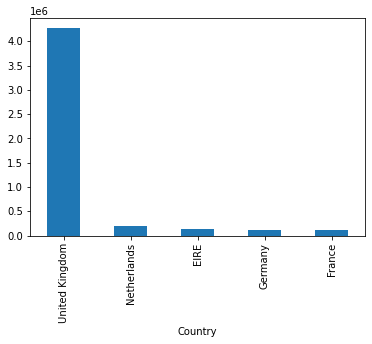

In [9]:
# Top 5 Companies with high number of purchase
country_price[:5].plot(kind = 'bar')

<AxesSubplot:xlabel='Country'>

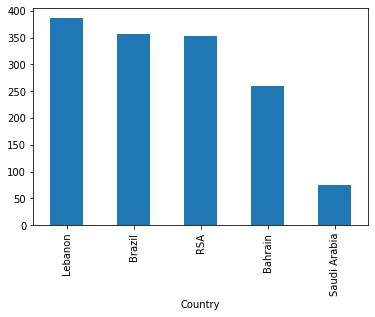

In [10]:
# 5 Compaies with least number of purchase
country_price[33:].plot(kind = 'bar')

In [12]:
df['InvoiceDate'] = pd.to_datetime(df.InvoiceDate, format='%d-%m-%Y %H:%M')

In [13]:
# Adding year feature to the dataset 

timest = df['InvoiceDate'].dt.year

new_df['Year'] = timest

new_df.head()

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,CustomerID,InvoiceNo,StockCode,Quantity,TotalAmount,InvoiceDate,Country,Year
0,17850.0,536365,85123A,6,15.30,01-12-2010 08:26,United Kingdom,2010
1,17850.0,536365,71053,6,20.34,01-12-2010 08:26,United Kingdom,2010
2,17850.0,536365,84406B,8,22.00,01-12-2010 08:26,United Kingdom,2010
3,17850.0,536365,84029G,6,20.34,01-12-2010 08:26,United Kingdom,2010
4,17850.0,536365,84029E,6,20.34,01-12-2010 08:26,United Kingdom,2010


<AxesSubplot:xlabel='Year'>

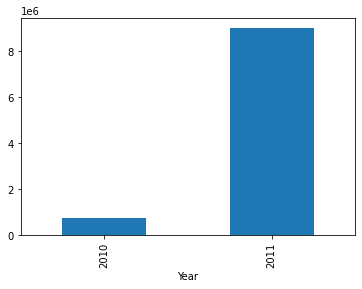

In [14]:
# Total sales for different years

new_df.groupby('Year')['TotalAmount'].sum().plot(kind = 'bar')

In [15]:
new_df['InvoiceDate'] = pd.to_datetime(new_df.InvoiceDate, format='%d-%m-%Y %H:%M')

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<AxesSubplot:title={'center':'Sales month wise'}, xlabel='Mon,Year'>

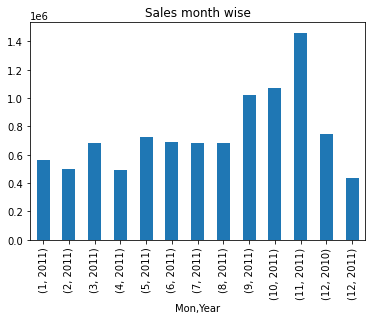

In [16]:
# Sales for different months

new_df['Mon'] = new_df['InvoiceDate'].dt.month
new_df['month'] = new_df['InvoiceDate'].dt.month_name() 
new_df.groupby(['Mon','Year'])['TotalAmount'].sum().plot(kind = 'bar', title = 'Sales month wise')

In [17]:
# Checking why dec 2011 has a drop comparing to nov 2011
get_2011 = new_df[(new_df['Year'] == 2011)]
get_dec2011 = get_2011[(new_df['month'] == 'December')]
get_dec2011 = get_dec2011['InvoiceDate'].dt.date.unique()
get_dec2011

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


array([datetime.date(2011, 12, 1), datetime.date(2011, 12, 2),
       datetime.date(2011, 12, 4), datetime.date(2011, 12, 5),
       datetime.date(2011, 12, 6), datetime.date(2011, 12, 7),
       datetime.date(2011, 12, 8), datetime.date(2011, 12, 9)],
      dtype=object)

# Answer :

## Performance Analysis

Sales Performance can be seen with

Number of sales every month
Number of sales every year

We see that in 2010 we have sales only for dec and in 2011 we have sales for all months

We can see that from September to Novembor we have very good sales
We could see that DEC 2010 we have sales of 748957 and in DEC 2011 we have sales of 433668 which is a huge drop when analyzed further found out that We have only data upto 9th on dec 2011, so we find a sales drop in the month of dec 2011

## 3. Based on your analysis of the data, what are potential areas of improvement for the business?

In [18]:
new_df.head()

,CustomerID,InvoiceNo,StockCode,Quantity,TotalAmount,InvoiceDate,Country,Year,Mon,month
0,17850.0,536365,85123A,6,15.30,2010-12-01 08:26:00,United Kingdom,2010,12,December
1,17850.0,536365,71053,6,20.34,2010-12-01 08:26:00,United Kingdom,2010,12,December
2,17850.0,536365,84406B,8,22.00,2010-12-01 08:26:00,United Kingdom,2010,12,December
3,17850.0,536365,84029G,6,20.34,2010-12-01 08:26:00,United Kingdom,2010,12,December
4,17850.0,536365,84029E,6,20.34,2010-12-01 08:26:00,United Kingdom,2010,12,December


In [19]:
new_df = new_df.dropna()
new_df.isnull().sum()

CustomerID     0
InvoiceNo      0
StockCode      0
Quantity       0
TotalAmount    0
InvoiceDate    0
Country        0
Year           0
Mon            0
month          0
dtype: int64

<AxesSubplot:title={'center':'Most Customers for country'}, xlabel='Country'>

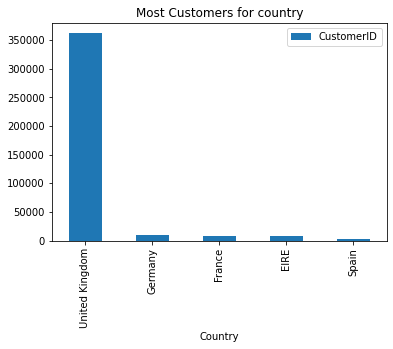

In [20]:
#Countries with more number of customers
cus_id = pd.DataFrame(new_df.groupby('Country')['CustomerID'].count().sort_values(ascending = False))
cus_id[:5].plot(kind = 'bar', title = 'Most Customers for country')

<AxesSubplot:title={'center':'Least customers for country'}, xlabel='Country'>

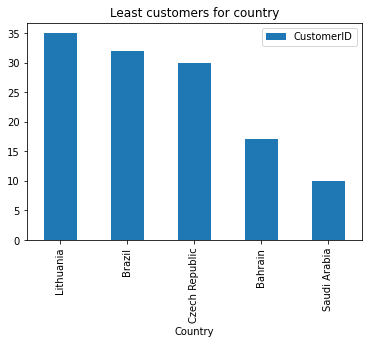

In [21]:
# Countries with less number of customers
cus_id[-5:].plot(kind = 'bar', title = 'Least customers for country')

## Answer-

We see that september to december we have very high sales
We can concentrate on improving the sales for the other 8 months
We find very less number of customers in Lithania, Brazil, Czech Republic, Bahrain, Saudi Arabia
We have very less sales for Lebanon, Brazil, RSA, Bahrain, Saudi Arabia. We can concentrate on improving their sales
We could improve the business by increasing the customers and sales point of view

## 4. What are additional business problems that can be analyzed using this data. Support with explanation.

In [22]:
# Removing the null values since we are checking the data based on customer and description
new_df2 = new_df2.dropna()
new_df2.isnull().sum()
new_df2.head()

,CustomerID,InvoiceNo,StockCode,Quantity,UnitPrice,TotalAmount,Description,InvoiceDate,Country
0,17850.0,536365,85123A,6,2.55,15.30,WHITE HANGING HEART T-LIGHT HOLDER,01-12-2010 08:26,United Kingdom
1,17850.0,536365,71053,6,3.39,20.34,WHITE METAL LANTERN,01-12-2010 08:26,United Kingdom
2,17850.0,536365,84406B,8,2.75,22.00,CREAM CUPID HEARTS COAT HANGER,01-12-2010 08:26,United Kingdom
3,17850.0,536365,84029G,6,3.39,20.34,KNITTED UNION FLAG HOT WATER BOTTLE,01-12-2010 08:26,United Kingdom
4,17850.0,536365,84029E,6,3.39,20.34,RED WOOLLY HOTTIE WHITE HEART.,01-12-2010 08:26,United Kingdom


In [23]:
# Sales Average of each product

avg_sales = new_df2.groupby(['StockCode','Description'])['Quantity','TotalAmount'].mean().sort_values(by = 'Quantity',ascending = False)
avg_sales

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,,Quantity,TotalAmount
StockCode,Description,,
47556B,TEA TIME TEA TOWELS,1300.000000,3022.500000
84568,GIRLS ALPHABET IRON ON PATCHES,520.000000,97.200000
84826,ASSTD DESIGN 3D PAPER STICKERS,368.702703,9.145405
18007,ESSENTIAL BALM 3.5g TIN IN ENVELOPE,325.333333,21.320000
20914,SET/5 RED SPOTTY LID GLASS BOWLS,288.000000,734.400000
...,...,...,...
21412,VINTAGE GOLD TINSEL REEL,-6.000000,-2.520000
79323W,WHITE CHERRY LIGHTS,-8.000000,-54.000000
21144,PINK POODLE HANGING DECORATION,-12.000000,-4.560000


## Answers -

We can see the demand for each product
We can further check month wise on which product is on more demand for which month. If there is any seasonality for the product
Further deeper analysis can be carried out customer wise